# Stroke Dataset EDA

Exploratory Data Analysis for `healthcare-dataset-stroke-data.csv` using Python libraries.


In [13]:
# Import Library

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

In [14]:
# Load Dataset

df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [15]:
# Check Dataset Info

df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [16]:
# Fill in the blank BMI values with the median

df['bmi'] = df['bmi'].fillna(df['bmi'].median())

## General Distribution

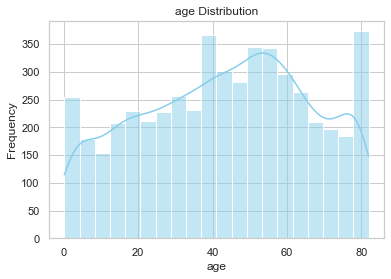

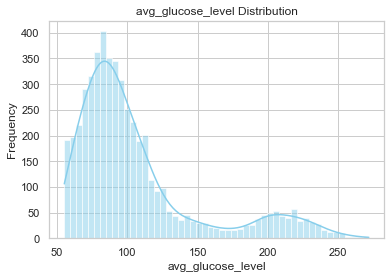

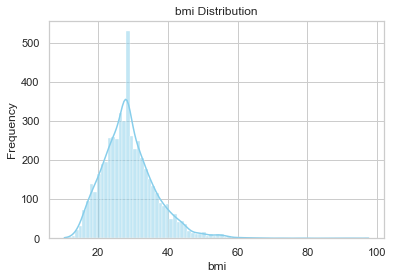

In [46]:
# Numerical Data

numerical_columns = ['age', 'avg_glucose_level', 'bmi']

for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


# Interpretation

1. **Age Distribution**
- The population is widely spread from young to old. The peak is at age **around 50-60 years**.

2. **Average Glucose Level Distribution**
- The distribution is also right-skewed, indicating **many individuals have high blood sugar** (>120 mg/dL).

3. **BMI Distribution**
- The distribution is right-skewed — many individuals have a BMI in the **25–30** range, indicating **overweight**.

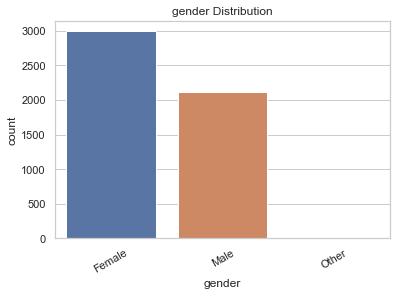

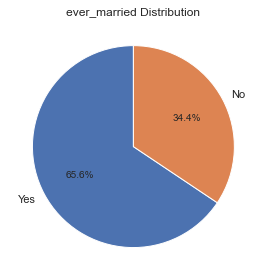

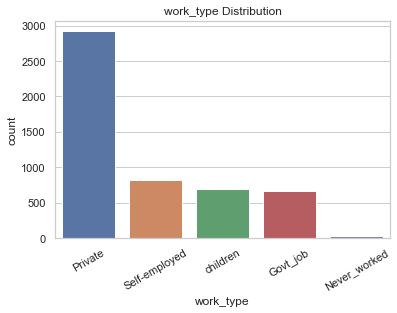

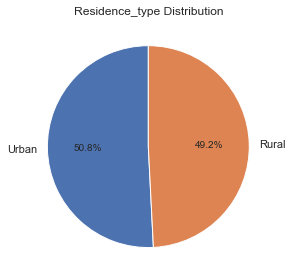

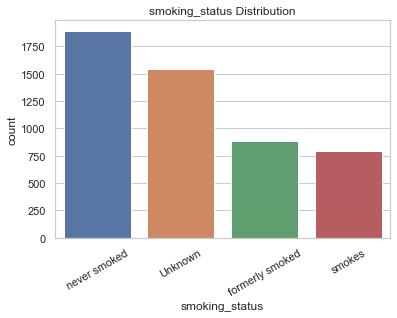

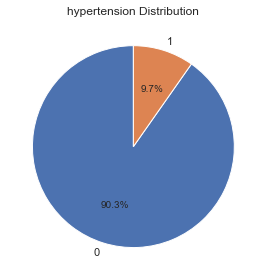

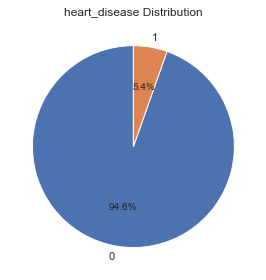

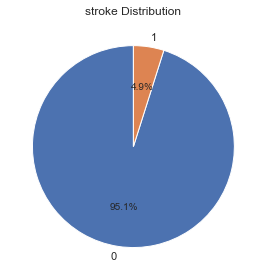

In [43]:
# Categorical Data

categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease', 'stroke']

for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    if df[col].nunique() <= 2:
        df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
        plt.ylabel('')
        plt.title(f'{col} Distribution')
        plt.tight_layout()
    else:
        sns.countplot(x=col, data=df, order=df[col].value_counts().index)
        plt.title(f'{col} Distribution')
        plt.xticks(rotation=30)
    plt.show()


# Interpretation

1. **Gender**
- The number of men and women is quite balanced, although women are slightly more numerous. There is "Other" which should be removed.

2. **Ever Married**
- Most individuals are **married** (~65.6%), the rest are not.

3. **Work Type**
- **Private sector** is the dominant category in the type of work. Followed by the **self-employed**, **government**, **children**, and **never worked** sectors.

7. **Residence Type**
- Data is divided almost **balanced** between **Urban** and **Rural**.

5. **Smoking Status**
- The largest proportion is the **"never smoked"** category followed by **"formerly smoked"**, **"smokes"**, and a small number of **"Unknown"**.

6. **Hypertension**
- Around **92.2%** do not suffer from hypertension, and only **7.8%** suffer from hypertension.

7. **Heart Disease**
- The majority of respondents **do not have heart disease** (95.7%), only 4.3% do.

8. **Stroke**
- Only about **5% of the population has a stroke**, the rest do not (**imbalanced** dataset).

In [25]:
# Stroke Distribution

stroke_counts = df['stroke'].value_counts(normalize=True)
print(stroke_counts)

0    0.951272
1    0.048728
Name: stroke, dtype: float64


##  Stroke based on Gender, Hypertension, and Heart Disease

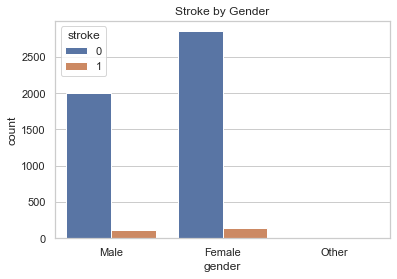

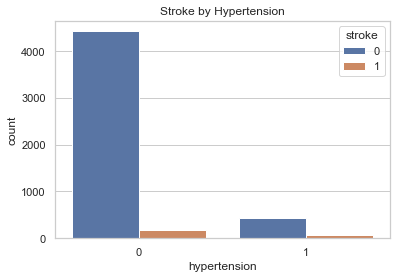

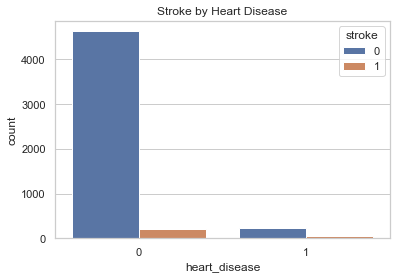

In [19]:
sns.countplot(data=df, x='gender', hue='stroke')
plt.title('Stroke by Gender')
plt.show()

sns.countplot(data=df, x='hypertension', hue='stroke')
plt.title('Stroke by Hypertension')
plt.show()

sns.countplot(data=df, x='heart_disease', hue='stroke')
plt.title('Stroke by Heart Disease')
plt.show()

# Interpretation

1. **Stroke vs Gender**
- Strokes are **more common in women**, in line with the larger population.

2. **Stroke vs Hypertension**
- Likewise, strokes are **more common in people with hypertension**, confirming hypertension as a major risk factor.

3. **Stroke vs Heart Disease**
- People with heart disease are **much more likely** to have a stroke.

## Social and Lifestyle Factors

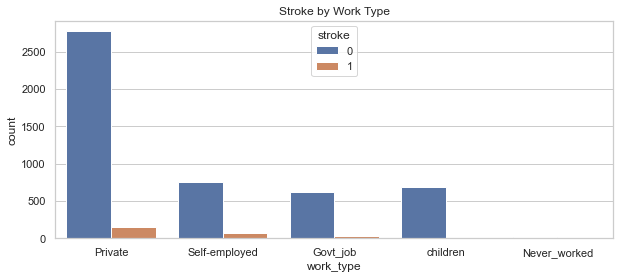

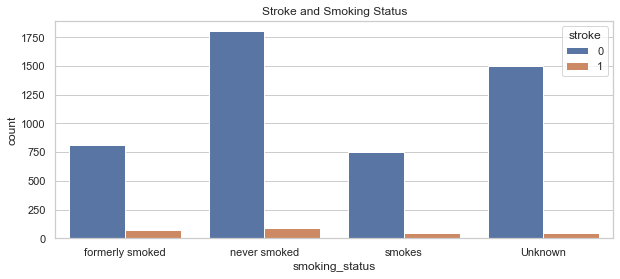

In [22]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='work_type', hue='stroke')
plt.title('Stroke by Work Type')
plt.show()

plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='smoking_status', hue='stroke')
plt.title('Stroke and Smoking Status')
plt.show()

# Interpretation

1. **Stroke vs Work Type**
- Stroke is most common in individuals who work in **Private** and **Self-employed**.

2. **Stroke vs Smoking Status**
- Stroke is quite common in the **formerly smoked** and **smokes** categories.

## Multivariate Relationships

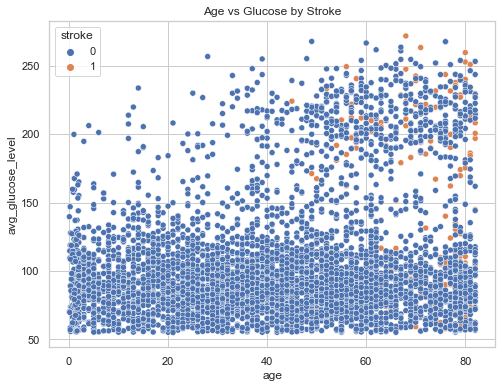

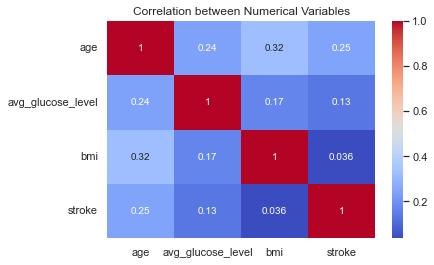

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='avg_glucose_level', hue='stroke')
plt.title('Age vs Glucose by Stroke')
plt.show()

# Korelasi
corr = df[['age', 'avg_glucose_level', 'bmi', 'stroke']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Numerical Variables')
plt.show()

1. **Scatterplot (Age vs Glucose level)**
- The majority of stroke sufferers are in the age group **>50 years** with sugar levels **>120 mg/dL**, strengthening the indication of **age and high blood sugar** as important factors.

2. **Correlation Heatmap**
- The correlations between `stroke` and numeric features such as `age`, `avg_glucose_level`, and `bmi` are all **positive but weak**.

- Highest correlation with `age` (~0.25), indicating **the older, the greater the chance of stroke**.